# BioNeuralNet Demo
This notebook demonstrates the core functionality of the BioNeuralNet package. It covers data loading, network generation, network embedding via GNNs, subject representation integration, downstream disease prediction, evaluation metrics, clustering, and use of external tools."

### BioNeuralNet offers a number of classes and functions.

In [ ]:
from bioneuralnet.network_embedding import GNNEmbedding
from bioneuralnet.subject_representation import GraphEmbedding
from bioneuralnet.downstream_task import DPMON
from bioneuralnet.clustering import CorrelatedPageRank
from bioneuralnet.clustering import CorrelatedLouvain
from bioneuralnet.clustering import HybridLouvain
from bioneuralnet.datasets import DatasetLoader

from bioneuralnet.metrics import omics_correlation
from bioneuralnet.metrics import cluster_correlation
from bioneuralnet.metrics import louvain_to_adjacency
from bioneuralnet.metrics import evaluate_rf
from bioneuralnet.metrics import plot_variance_distribution
from bioneuralnet.metrics import plot_variance_by_feature
from bioneuralnet.metrics import plot_performance
from bioneuralnet.metrics import plot_embeddings
from bioneuralnet.metrics import plot_network
from bioneuralnet.metrics import compare_clusters

from bioneuralnet.utils import omics_data_filter
from bioneuralnet.utils import network_filter
from bioneuralnet.utils import rdata_to_df
from bioneuralnet.utils import get_logger

from bioneuralnet.external_tools import SmCCNet
from bioneuralnet.external_tools import WGCNA

### Load Data

In [2]:
import pandas as pd
from IPython.display import display
from bioneuralnet.datasets import DatasetLoader

loader = DatasetLoader("example1")
omics1, omics2, phenotype, clinical = loader.load_data()

display(omics1)
display(omics2)
display(phenotype)
display(clinical)


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_491,Gene_492,Gene_493,Gene_494,Gene_495,Gene_496,Gene_497,Gene_498,Gene_499,Gene_500
Samp_1,22.485701,40.353720,31.025745,20.847206,26.697293,30.205449,23.512005,33.677622,19.430333,30.260153,...,12.967210,13.334132,13.262070,13.608147,13.338606,15.247613,13.603157,14.727795,13.400950,12.769172
Samp_2,37.058850,34.052233,33.487020,23.531461,26.754628,31.735945,22.795952,29.301536,14.936397,30.823015,...,11.886247,13.241386,12.445773,13.400288,12.587993,15.048676,12.018609,14.513958,12.066379,12.583460
Samp_3,20.530767,31.669623,35.189567,20.952544,25.018826,32.157235,25.069464,22.853719,18.220225,23.092805,...,12.198357,12.869640,12.841290,13.127437,12.607377,14.398177,12.554904,14.339382,12.891962,12.760553
Samp_4,33.186888,38.480880,18.897097,31.823300,34.049383,38.799887,24.106468,12.397175,13.724255,27.703085,...,12.197502,13.312536,11.645099,13.933684,12.103087,15.133432,12.436027,15.116888,12.810732,12.972879
Samp_5,28.961981,41.060494,28.494956,18.374495,30.815238,24.004535,29.616296,24.364045,11.409338,33.599828,...,14.157141,13.386978,13.007109,13.826532,12.343930,15.280175,13.363962,14.008675,12.479124,12.156407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samp_354,24.520652,28.595409,31.299666,32.095379,33.659730,29.353948,29.871659,25.089732,14.437588,27.261916,...,11.748228,13.096453,12.768936,13.228560,11.595884,15.251601,12.055375,15.530606,13.644383,13.018032
Samp_355,31.252789,28.988087,29.574195,31.189288,32.098841,26.849138,22.619669,28.006670,8.615549,30.838843,...,11.460876,12.994504,13.325608,13.386970,12.335143,14.966097,13.998975,13.250821,12.947672,13.161434
Samp_356,24.894826,25.944887,30.852641,26.705158,30.102546,37.197952,35.032309,34.775576,13.354611,29.697348,...,12.884821,12.785372,12.954534,13.906209,12.074805,15.519179,12.742078,14.445011,12.129990,13.844271
Samp_357,17.034337,38.574705,25.095201,37.062442,35.417758,29.753145,25.855997,25.603043,13.180794,31.188598,...,13.278454,13.445404,12.457436,14.036252,13.412114,14.158416,13.284701,13.662274,12.943670,13.996352


,Mir_1,Mir_2,Mir_3,Mir_4,Mir_5,Mir_6,Mir_7,Mir_8,Mir_9,Mir_10,...,Mir_91,Mir_92,Mir_93,Mir_94,Mir_95,Mir_96,Mir_97,Mir_98,Mir_99,Mir_100
Samp_1,15.223913,17.545826,15.784719,14.891983,10.348205,9.689755,11.093630,13.189246,12.526561,10.311609,...,7.551462,5.407878,13.933045,10.287521,10.213316,10.609973,14.554996,10.955650,11.422531,10.862970
Samp_2,16.306965,16.672830,13.361529,14.488549,12.660905,11.333613,11.254930,13.457435,13.279747,10.428848,...,6.862413,7.309226,13.586180,11.975544,11.496937,10.653742,14.414225,11.811004,12.413667,10.719110
Samp_3,16.545119,16.735005,14.617472,17.845267,13.822790,11.329333,11.171749,12.715107,13.787771,10.364577,...,6.874958,7.754733,13.847029,12.424403,10.930177,10.255484,13.570352,11.311925,11.072915,11.418794
Samp_4,13.986899,16.207432,16.293078,17.725286,12.300565,9.844108,11.586551,11.878702,14.594392,10.936651,...,9.615623,6.693593,13.840728,12.245466,10.836894,11.502232,15.483399,10.812811,10.121957,11.039089
Samp_5,16.338332,17.393869,16.397925,15.853725,13.387675,10.599414,12.355466,12.450426,13.778779,10.405327,...,9.146865,8.104206,13.903452,11.423350,9.997107,10.744586,14.465583,11.730166,12.206151,10.724849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samp_354,15.065065,16.079830,14.635616,17.013845,11.612843,9.850100,11.375670,12.870558,13.873811,11.369083,...,8.110691,8.124900,14.316491,12.599296,10.302683,11.286541,14.478041,11.141163,11.102427,11.993050
Samp_355,15.997576,15.448951,15.355566,16.501752,11.701778,11.323521,11.610163,12.733208,13.650662,10.770903,...,8.711232,6.977555,14.805837,12.283549,10.847157,9.833187,14.037476,11.082880,11.708466,10.654141
Samp_356,15.206862,14.395378,16.218001,16.044955,13.650741,11.057462,13.324846,13.070428,16.109746,11.253359,...,7.497926,6.840175,15.048896,12.615673,10.583973,12.708186,16.325254,10.789635,10.830833,10.983455
Samp_357,14.474129,15.482863,15.512549,15.136613,14.531277,10.713539,11.632242,13.792981,13.486404,10.870028,...,7.902283,7.339226,14.295151,11.853855,10.439473,11.897782,16.684790,10.847185,11.491449,11.684467


,phenotype
Samp_1,235.067423
Samp_2,253.544991
Samp_3,234.204994
Samp_4,281.035429
Samp_5,245.447781
...,...
Samp_354,236.120451
Samp_355,222.572359
Samp_356,268.472285
Samp_357,235.808167


,Age,Gender,BMI,Chronic_Bronchitis,Emphysema,Asthma
PatientID,,,,,,
Samp_1,78,0,31.2,1,1,0
Samp_2,68,1,19.2,1,0,0
Samp_3,54,1,19.3,0,1,1
Samp_4,47,1,36.2,0,0,1
Samp_5,60,1,26.2,0,1,1
...,...,...,...,...,...,...
Samp_354,71,0,23.0,1,0,1
Samp_355,62,1,25.5,0,1,1
Samp_356,61,0,21.1,1,0,0


### Generate Global Network using SmCCNet

In [ ]:
from bioneuralnet.external_tools import SmCCNet

smccnet = SmCCNet(
    phenotype_df=phenotype,
    omics_dfs=[omics1, omics2],
    data_types=["genes", "proteins"],
)
global_network, smccnet_clusters = smccnet.run()

print("Global network shape:", global_network.shape)
print("Number of SmCCnet clusters:", len(smccnet_clusters))
display(global_network.head())


In [4]:
display(global_network.head())

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Mir_91,Mir_92,Mir_93,Mir_94,Mir_95,Mir_96,Mir_97,Mir_98,Mir_99,Mir_100
Gene_1,0.000000,0.160757,0,0,0.043592,0.271547,0.277287,0,0.009604,0.043405,...,0,0,0,0,0,0.004766,0,0,0,0
Gene_2,0.160757,0.000000,0,0,0.038431,0.243888,0.239016,0,0.008589,0.037873,...,0,0,0,0,0,0.005787,0,0,0,0
Gene_3,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0,0,0,0,0,0.000000,0,0,0,0
Gene_4,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0,0,0,0,0,0.000000,0,0,0,0
Gene_5,0.043592,0.038431,0,0,0.000000,0.066452,0.060837,0,0.002207,0.010718,...,0,0,0,0,0,0.000953,0,0,0,0


### Generate Network Embeddings using GNNEmbedding

In [ ]:
from bioneuralnet.network_embedding import GNNEmbedding

merged_omics = pd.concat([omics1, omics2], axis=1)

gnn = GNNEmbedding(
    adjacency_matrix=global_network,
    omics_data=merged_omics,
    phenotype_data=phenotype,
    clinical_data=clinical,
    phenotype_col="phenotype",
    model_type="GAT",
    hidden_dim=64,
    layer_num=4,
    dropout=True,
    num_epochs=100,
    lr=1e-3,
    weight_decay=1e-4,
    seed=119,
)
gnn.fit()
embeddings = gnn.embed(as_df=True)

In [6]:
display(embeddings.head())

,Embed_1,Embed_2,Embed_3,Embed_4,Embed_5,Embed_6,Embed_7,Embed_8,Embed_9,Embed_10,...,Embed_55,Embed_56,Embed_57,Embed_58,Embed_59,Embed_60,Embed_61,Embed_62,Embed_63,Embed_64
Gene_1,0.037078,0.010051,-0.036622,0.022973,0.029106,-0.024114,0.031300,0.028295,0.047263,0.024042,...,-0.017544,0.042265,0.017295,-0.030349,0.029958,-0.020222,0.029427,-0.026153,-0.025061,0.028961
Gene_2,0.037078,0.010051,-0.036622,0.022973,0.029106,-0.024114,0.031300,0.028295,0.047263,0.024042,...,-0.017544,0.042265,0.017295,-0.030349,0.029958,-0.020222,0.029427,-0.026153,-0.025061,0.028961
Gene_3,0.038274,0.007089,-0.050431,0.026016,0.025564,-0.028543,0.030443,0.017762,0.045573,0.018522,...,-0.017076,0.048518,0.014335,-0.023130,0.029575,-0.023226,0.028018,-0.041073,-0.041075,0.030907
Gene_4,0.032268,0.003910,-0.033076,0.024749,0.044768,-0.014179,0.017665,0.014499,0.052139,0.028020,...,-0.022137,0.030999,0.015979,-0.034100,0.028120,-0.025319,0.027917,-0.012606,-0.028836,0.026390
Gene_5,0.037078,0.010051,-0.036622,0.022973,0.029106,-0.024114,0.031300,0.028295,0.047263,0.024042,...,-0.017544,0.042265,0.017295,-0.030349,0.029958,-0.020222,0.029427,-0.026153,-0.025061,0.028961


### Embeddings visualization

2025-03-07 12:31:43,802 - bioneuralnet.network_embedding.gnn_embedding - INFO - Preparing node labels by correlating each omics feature with phenotype column 'phenotype'.
2025-03-07 12:31:43,803 - bioneuralnet.network_embedding.gnn_embedding - INFO - Index(['Samp_1', 'Samp_2', 'Samp_3', 'Samp_4', 'Samp_5', 'Samp_6', 'Samp_7',
       'Samp_8', 'Samp_9', 'Samp_10',
       ...
       'Samp_349', 'Samp_350', 'Samp_351', 'Samp_352', 'Samp_353', 'Samp_354',
       'Samp_355', 'Samp_356', 'Samp_357', 'Samp_358'],
      dtype='object', length=358)
2025-03-07 12:31:43,875 - bioneuralnet.network_embedding.gnn_embedding - INFO - Node labels prepared successfully.


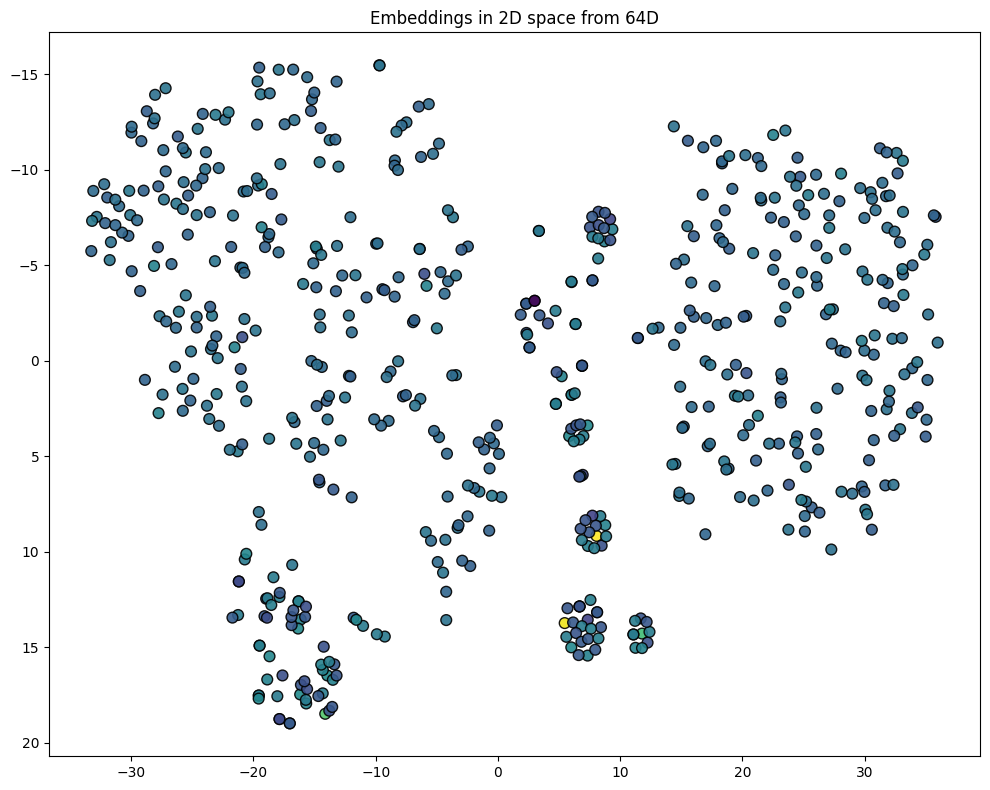

In [7]:
from bioneuralnet.metrics import plot_embeddings

# Using our embeddings instance we get the necessary labels for the graph.
node_labels = gnn._prepare_node_labels()
embeddings_array = embeddings.values  

embeddings_plot = plot_embeddings(embeddings_array, node_labels)

### Integrate Embeddings into Omics Data with GraphEmbedding

- Let use these omics to enrich the representation of the original dataset.

- The `GraphEmbedding` function takes our previously generated embeddings and our original Omics Dataset and associated Phenotype

- This function will use the embeddings to enrich the orignal dataset. For more details and how this is performed please view our `GNN Embeddings for Multi-Omics` tab.

In [ ]:
from bioneuralnet.subject_representation import GraphEmbedding

graph_embed = GraphEmbedding(
    omics_data=merged_omics,
    embeddings=embeddings,
    phenotype_data=phenotype,
    phenotype_col="phenotype",
    reduce_method="PCA",
    tune=False,
)
enhanced_omics = graph_embed.run()


In [9]:
display(enhanced_omics.head())

,Gene_213,Gene_177,Mir_78,Gene_50,Gene_335,Gene_491,Gene_187,Mir_74,Gene_76,Gene_357,...,Gene_371,Mir_84,Mir_40,Gene_266,Gene_62,Gene_239,Gene_496,Mir_33,Gene_495,Gene_249
Samp_1,31.972913,7.749811,4.713763,-0.749105,-0.823750,-0.784272,-0.611546,-6.206424,-0.764613,0.006680,...,7.257692,9.188055,-0.359187,14.058017,-0.777809,-3.507224,0.545008,-8.300834,3.433189,-17.325618
Samp_2,30.562847,7.616120,3.262150,-0.715228,-0.904390,-0.718894,-0.778848,-7.043132,-0.751795,0.006527,...,6.266241,10.170368,-0.334464,14.220815,-0.754667,-3.325996,0.537897,-7.037332,3.239990,-16.226066
Samp_3,30.319072,7.959335,5.177822,-0.799192,-0.890603,-0.737770,-0.916597,-6.473910,-0.757998,0.006260,...,6.520219,9.402382,-0.359254,14.802170,-0.734408,-3.654560,0.514646,-7.261344,3.244979,-17.947806
Samp_4,33.532754,8.136440,4.885794,-0.715119,-0.800914,-0.737719,-0.601052,-7.031316,-0.744343,0.005747,...,6.069317,8.792790,-0.320809,14.675955,-0.778705,-3.532869,0.540927,-6.572756,3.115182,-19.260010
Samp_5,32.241288,8.248584,3.934224,-0.797891,-0.813945,-0.856240,-0.324133,-6.991057,-0.719048,0.007457,...,6.832945,9.096281,-0.414235,14.231641,-0.729173,-3.555468,0.546172,-7.145498,3.177172,-20.107202


### Comparing results for prediction task

In [27]:
from bioneuralnet.metrics import evaluate_rf
from bioneuralnet.metrics import plot_performance

y_phenotype = phenotype.values
X_enriched_omics = enhanced_omics.values
X_raw_omics = merged_omics.values

accuracy_with_embeddings = evaluate_rf(X_enriched_omics, y_phenotype, mode="regression")
accuracy_alone = evaluate_rf(X_enriched_omics, y_phenotype, mode="regression")

c:\Users\ramos\Desktop\GitHub\BioNeuralNet\.venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ramos\Desktop\GitHub\BioNeuralNet\.venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


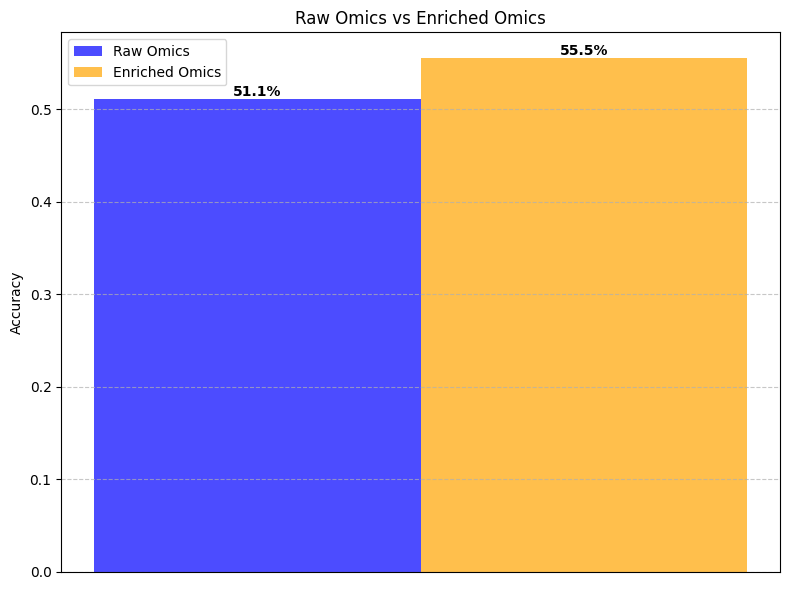

In [28]:
plot_performance(accuracy_with_embeddings, accuracy_alone, "Raw Omics vs Enriched Omics")

### Disease Prediction using DPMON(Disease Prediction using Multi-Omics Networks)

- DPMON is a classification task.
- We will adjust our phenotype from continus value to a class from 0 to 3

In [12]:
from bioneuralnet.datasets import DatasetLoader
import numpy as np

loader = DatasetLoader("example1")
omics1, omics2, phenotype, clinical = loader.load_data()
display(phenotype)

min_val = phenotype["phenotype"].min()
max_val = phenotype["phenotype"].max()

# linspace creates an array of evenly spaced values
bins = np.linspace(min_val, max_val, 5)

phenotype["phenotype"] = pd.cut(phenotype["phenotype"], bins=bins, labels=[0, 1, 2, 3], include_lowest=True)
count_values = phenotype["phenotype"].value_counts(sort=False)

,phenotype
Samp_1,235.067423
Samp_2,253.544991
Samp_3,234.204994
Samp_4,281.035429
Samp_5,245.447781
...,...
Samp_354,236.120451
Samp_355,222.572359
Samp_356,268.472285
Samp_357,235.808167


### Phenotype after:

In [13]:
display(phenotype)
display(count_values)

,phenotype
Samp_1,1
Samp_2,2
Samp_3,1
Samp_4,3
Samp_5,2
...,...
Samp_354,1
Samp_355,1
Samp_356,2
Samp_357,1


phenotype
0     38
1    158
2    141
3     21
Name: count, dtype: int64

### Visualizing the variance distribution and feature variance

2025-03-07 12:31:51,166 - bioneuralnet.metrics.plot - INFO - Computed variances for each feature.
2025-03-07 12:31:51,209 - bioneuralnet.metrics.plot - INFO - Variance distribution plot generated.


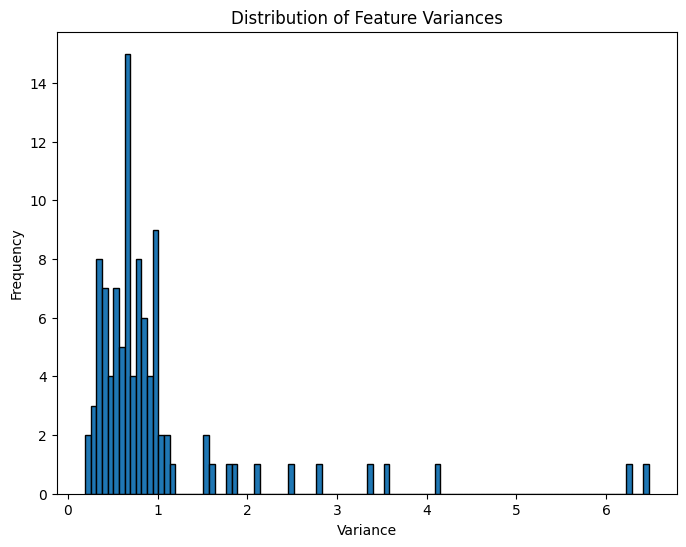

In [14]:
from bioneuralnet.metrics import plot_variance_distribution

fig = plot_variance_distribution(omics2, bins=100)

2025-03-07 12:31:51,338 - bioneuralnet.metrics.plot - INFO - Computed variances for each feature for index plot.
2025-03-07 12:31:51,348 - bioneuralnet.metrics.plot - INFO - Variance vs. feature index plot generated.


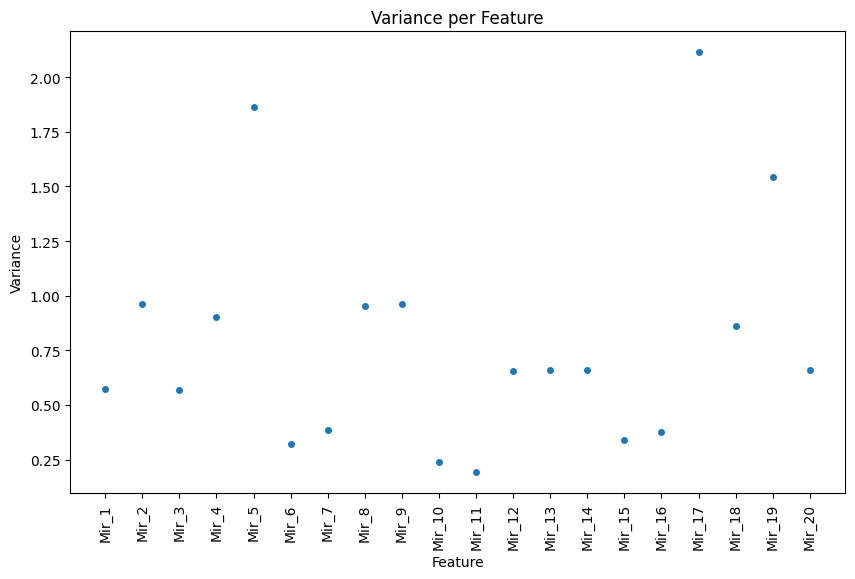

In [15]:
from bioneuralnet.metrics import plot_variance_by_feature

fig2 = plot_variance_by_feature(omics2.iloc[:, 0:20])

In [ ]:
from bioneuralnet.downstream_task import DPMON

dpmon = DPMON(
    adjacency_matrix=global_network,
    omics_list=[omics1, omics2],
    phenotype_data=phenotype,
    clinical_data=clinical,
    model="GAT",
    layer_num=4,
    num_epochs=100,
    lr=1e-3,
    weight_decay=1e-4,
    tune=False,
    gpu=False,
    output_dir="dpmon_output"
)
predictions = dpmon.run()


### DPMON Predictions

In [38]:
display(predictions[0])

,Actual,Predicted
0,1,1
1,2,2
2,1,1
3,3,3
4,2,2
...,...,...
353,1,1
354,1,2
355,2,2
356,1,1


c:\Users\ramos\Desktop\GitHub\BioNeuralNet\.venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


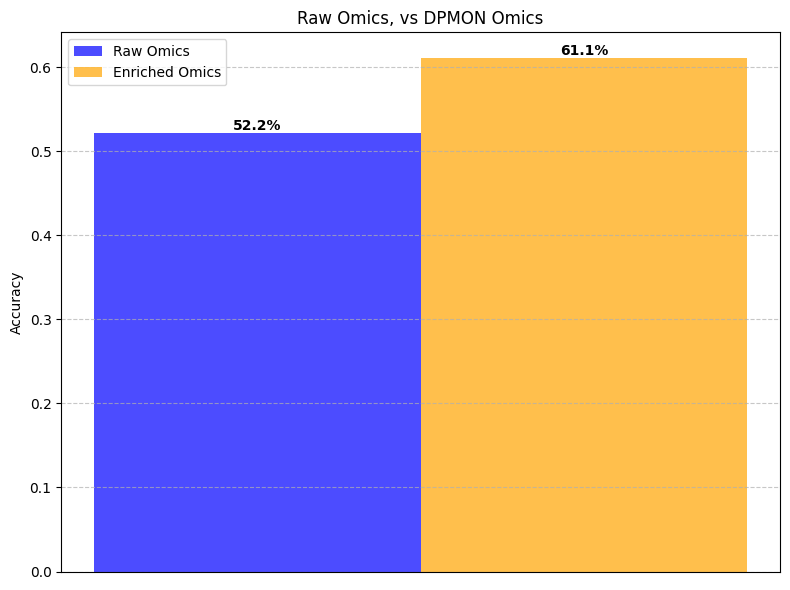

In [39]:
from bioneuralnet.metrics import evaluate_rf

X_raw = merged_omics.values
y_global = phenotype.values
rf_accuracy = evaluate_rf(X_raw, y_global, n=100, mode="classification")

plot_performance(predictions[1], rf_accuracy, "Raw Omics, vs DPMON Omics")

### Clustering with CorrelatedLouvain and HybridLouvain

- BioNeuralNet includes internal modules for performing correlated clustering on complex networks. 

- These methods modify and extend the traditional community detection by integrating phenotype correlation, allowing users to extract biologically relevant, phenotype-associated modules from any network. 

- For more details on how this performed, please visit our `Correlated Clustering Methods` tab

In [ ]:
from bioneuralnet.clustering import CorrelatedLouvain
import networkx as nx

merged_omics = pd.concat([omics1, omics2], axis=1)
G_network = nx.from_pandas_adjacency(global_network)

louvain_instance = CorrelatedLouvain(
    G=G_network,
    B=merged_omics,
    Y=phenotype,
    tune=True
)

louvain_clusters = louvain_instance.run(as_dfs=True)

In [20]:
display(f"Number of Louvain clusters: {len(louvain_clusters)}")

'Number of Louvain clusters: 3'

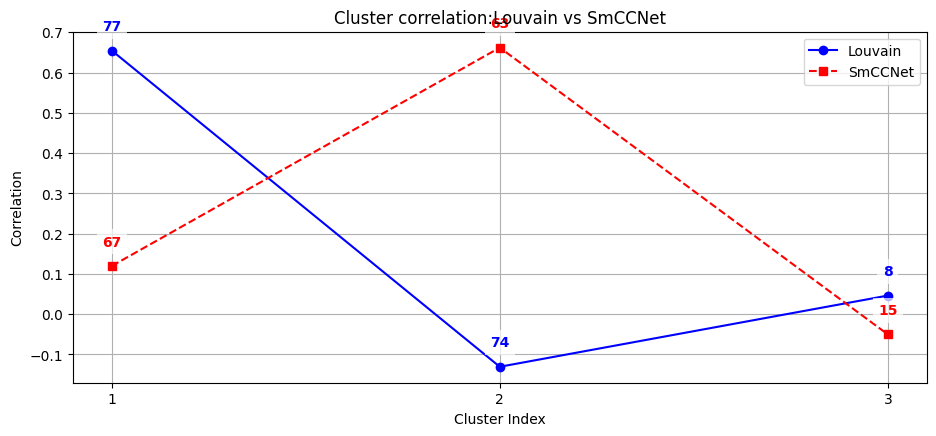

,Cluster,Louvain Size,Louvain Correlation,SMCCNET Size,SMCCNET Correlation
0,Cluster_1,77,0.654809,67,0.119675
1,Cluster_2,74,-0.130497,63,0.661981
2,Cluster_3,8,0.046296,15,-0.050186


In [21]:
# Lets comapre these clusters against SmCCNet clusters
from bioneuralnet.metrics import compare_clusters

compare_clusters(louvain_clusters, smccnet_clusters, phenotype, merged_omics)

### Lets plot the clustered network from correlated louvain

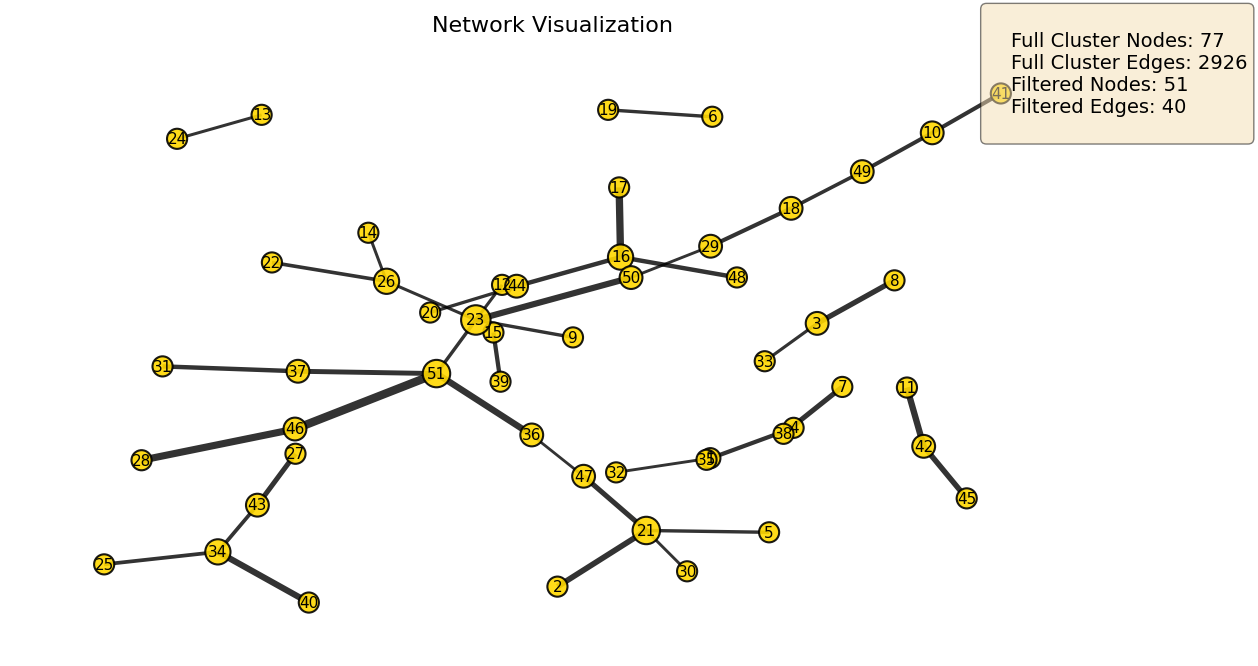

,Omic,Degree
Index,,
23,Gene_6,5
51,Gene_7,4
21,Gene_1,4
16,Mir_2,3
34,Gene_299,3


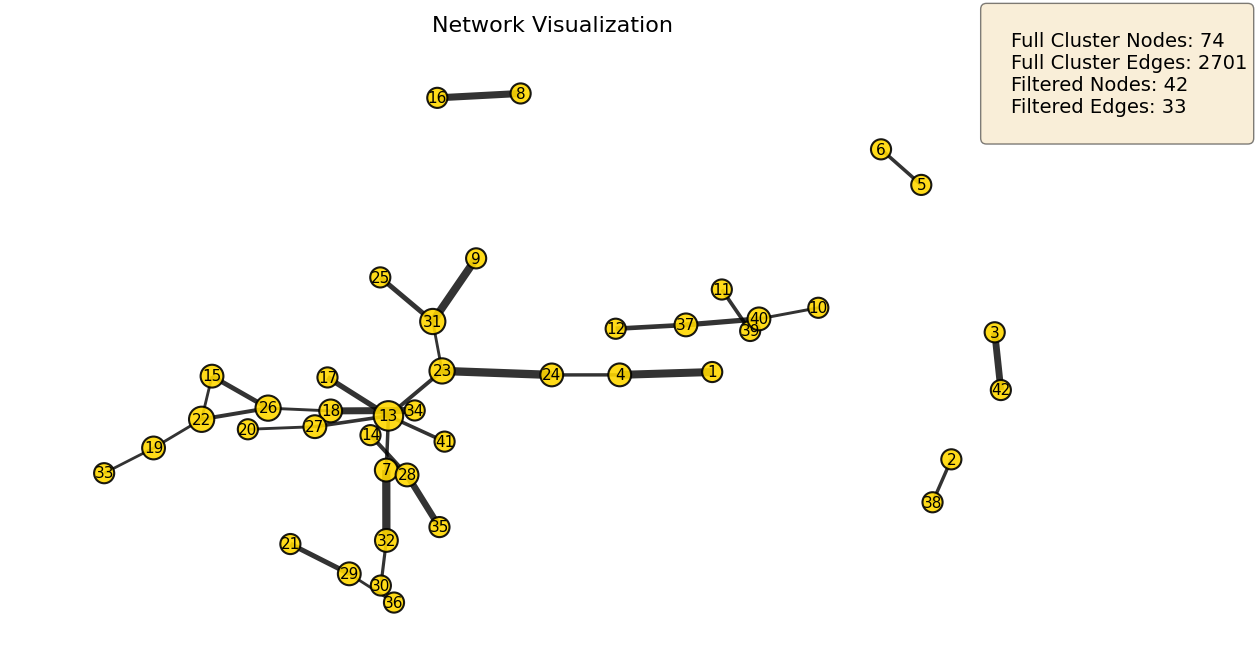

,Omic,Degree
Index,,
13,Gene_464,5
26,Gene_354,3
23,Gene_434,3
31,Gene_422,3
22,Gene_260,3


In [22]:
from bioneuralnet.metrics import plot_network
from bioneuralnet.metrics import louvain_to_adjacency

cluster1 = louvain_clusters[0]
cluster2 = louvain_clusters[1]

# Convert Louvain clusters into adjacency matrices
louvain_adj1 = louvain_to_adjacency(cluster1)
louvain_adj2 = louvain_to_adjacency(cluster2)

# Plot using the converted adjacency matrices
cluster1_mapping = plot_network(louvain_adj1, weight_threshold=0.12, show_labels=True, show_edge_weights=False)
display(cluster1_mapping.head())

cluster2_mapping = plot_network(louvain_adj2, weight_threshold=0.12, show_labels=True, show_edge_weights=False)
display(cluster2_mapping.head())

In [ ]:
from bioneuralnet.clustering import  HybridLouvain
import networkx as nx

merged_omics = pd.concat([omics1, omics2], axis=1)
G_network = nx.from_pandas_adjacency(global_network)

hybrid = HybridLouvain(
    G=G_network,
    B=merged_omics,
    Y=phenotype,
    k3=0.2,
    k4=0.8,
    max_iter=3,
    weight="weight",
    tune=False
)
hybrid_result = hybrid.run()
display("Number of clusters:", len(hybrid_result))


#### Package Version

In [24]:
import bioneuralnet
print("BioNeuralNet version:", bioneuralnet.__version__)

BioNeuralNet version: 1.0
